## Modelo Logístico
### Leandro León

Aplicar el modelo logístico a el dataset actualizado de covid 19 en Ecuador, comparar el modelo logistico con el modelo lineal y dar opinión sobre cuál es el mejor modelo hasta ahora para la predicción de datos

In [10]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from sklearn import linear_model
import matplotlib.pyplot as mp
%matplotlib inline

In [2]:
url = 'covid_19_clean_complete.csv'
df = pd.read_csv(url)
df

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


### Filtramos los datos que vamos a usar para que el modelo prediga

In [3]:
df = df[df['Country/Region'].isin(['Ecuador'])] #Filtro la Informacion solo para Ecuador
df = df.loc[:,['Date','Confirmed', 'Recovered']] #Selecciono las columnas de analasis
# Expresar las fechas en numero de dias desde el 01 Enero
FMT = '%Y-%m-%d'
date = df['Date']
df['Date'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-01-01", FMT)).days)

df

,Date,Confirmed,Recovered
95,21,0,0
356,22,0,0
617,23,0,0
878,24,0,0
1139,25,0,0
...,...,...,...
47858,204,78148,33455
48119,205,79049,34544
48380,206,80036,34544
48641,207,80694,34896


<AxesSubplot:xlabel='Date'>

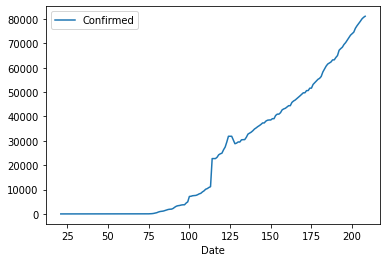

In [4]:
df.plot(x ='Date', y='Confirmed')

### Como se ha venido dando la curva de los contagios confirmados hasta la fecha desde el día 0

## Método para realizar el cálculo del modelo logístico

In [14]:
x = list(df.iloc [:, 0]) # Dias 
y = list(df.iloc [:, 2]) # Total casos
def modelo_logistico(x,a,b):
    return a+b*np.log(x)

exp_fit = curve_fit(modelo_logistico,x,y) #Extraemos los valores de los paramatros
print(exp_fit)

(array([-61822.61831902,  15513.00100466]), array([[22529298.25180224, -4825363.10809231],
       [-4825363.10809231,  1050619.40490352]]))


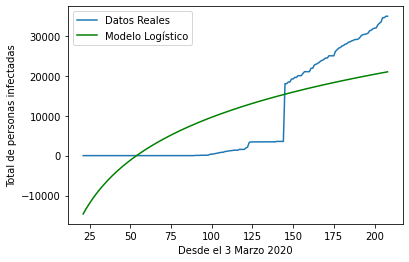

In [12]:
popt3, pcov2 = curve_fit(modelo_logistico, x, y) 

mp.rc('font', size=10)
mp.plot(x, y, label="Datos Reales")
mp.plot(x, modelo_logistico(x, *popt3), label="Modelo Logístico", color="green")
mp.legend()
mp.xlabel("Desde el 3 Marzo 2020")
mp.ylabel("Total de personas infectadas")
mp.show()

### Gráfica de ka curva que nos dá una vivión de como ha ido en aumento los ocntagios 

## Parte 2 comparación con el modelo líneal

### Ahora se realiza el modelo lineal el cual ya se ha realizado en deberes anteriores y se comporará con el modelo logístico

In [15]:
regr = linear_model.LinearRegression()
 
# Entrenamos nuestros modelos
regr.fit(np.array(x).reshape(-1, 1) ,y)

#regr.fit(np.array(x).reshape(-1, 1) ,z)

# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio

Coefficients: 
 [199.83446299]
Independent term: 
 -13454.397076432126


[ 50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85
  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103
 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121
 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157
 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175
 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193
 194 195 196 197 198 199]


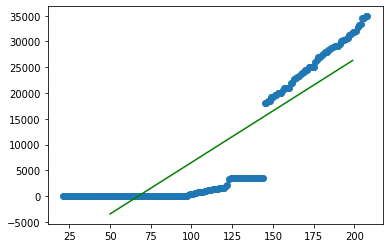

In [16]:
mp.scatter(x, y)
x_real = np.array(range(50, 200))
print(x_real)
mp.plot(x_real, regr.predict(x_real.reshape(-1, 1)), color='green')
mp.show()

## Análisis
Los modelos difieren de 5000 infectados lo que quiere decir que ambos se aproximan de manera conciderable al número real de personas infectadas por semana, pero es evidente que el modelo logístico es el más acertado.

